In the last post I described how to use SymPy to analytically solve the Schrödinger equation of the free particle and the particle in the infinite potential box. But these were really quite simple problems. This time I would like to consider one of the most important example systems of quantum mechanics, namely the *quantum harmonic oscillator*.



A (one-dimensional) classical harmonic oscillator is described by the following potential term:

$$
V(x) = \frac{1}{2} m \omega^2 x^2 \, ,
$$

where $\omega$ is the fundamental frequency of the
oscillation and $x$ is the coordinate of the displacement of the oscillating 
mass $m$ from the resting position at $x=0$.
The harmonic oscillator is so important because any small perturbation from a
stable equilibrium state can always be modeled as a harmonic oscillator in first approximation.

The classical Hamiltonian for the harmonic oscillator is then simply the kinetic 
energy of the oscillating particle plus the potential energy:

$$
H = \frac{1}{2m} p^2 + \frac{1}{2} m \omega^2 x^2
$$

By means of the [first quantization][first] the classical Hamiltonian is transformed 
into the quantum Hamiltonian by simply substituting the canonical variables
$x$ and $p$ with operators:

$$
\hat H = \frac{1}{2m} \hat p^2 + \frac{1}{2} m \omega^2 \hat x^2
$$

Here we are no longer looking for a solution curve for generalized coordinates $x(t)$ and $p(t)$, but rather
the $\hat x$ and $\hat p$ are themselves operators acting on the quantum mechanical state $\psi$.

Without going into details here now, in the following we consider the state $\psi$ in the spatial representation,
where the wave function $\psi(x,t)$ is the complex probability amplitude to find a particle in a
region $[x, x+ dx]$ at time $t$. In the spatial representation the two operators have 
have the following form

$$
\hat p = - i \hbar \frac{\partial}{\partial x} \qquad \hat x = x
$$

As discussed in the [last posting][wald_1], we are primarily interested in solving 
the time-independent Schrödinger equation and finally obtain:

$$
E \psi(x) = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x)}{\partial x^2} + \frac{1}{2} m \omega^2 x^2 \psi(x)
$$

For simplicity, we now move to dimensionless variables:

$$
\tilde x =\sqrt{\frac{m \omega}{\hbar}} x \, , \quad
\tilde E = \frac{2 E}{\hbar \omega}
$$

with which we then have the equation:

$$
\tilde{E} \psi(\tilde x) = -\frac{\partial^2 \psi(\tilde x)}{\partial \tilde x^2} 
+ \tilde x^2 \psi (\tilde x)
$$

To solve this equation I will now use SymPy like last time.


[first]: https://en.wikipedia.org/wiki/First_quantization
[wald_1]: https://znswanderer.github.io/blog/Solving-the-schr%C3%B6dinger-equation-with-SymPy/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp

psi = smp.symbols(r'\psi', cls=smp.Function, complex=True)
x = smp.symbols(r'\tilde{x}', real=True)
E = smp.symbols(r'\tilde{E}', real=True, positive=True)

The Hamiltonian and the Schrödinger equation then result in:

In [2]:
H_psi = - smp.diff(psi(x), x, x) + x**2 * psi(x)
eq_schroed = smp.Eq(E * psi(x), H_psi)
eq_schroed

Eq(\tilde{E}*\psi(\tilde{x}), \tilde{x}**2*\psi(\tilde{x}) - Derivative(\psi(\tilde{x}), (\tilde{x}, 2)))

However, if you now search for the solution of the Schrödinger equation by means of `dsolve`, SymPy unfortunately finds 
but only an approximation via polynomials, which also contains an unknown function $r()$:

In [3]:
smp.dsolve(eq_schroed, psi(x))

Eq(\psi(\tilde{x}), -\tilde{E}*\tilde{x}**5*r(3)/20 + C2*(\tilde{E}**2*\tilde{x}**4/24 - \tilde{E}*\tilde{x}**2/2 + \tilde{x}**4/12 + 1) + C1*\tilde{x}*(\tilde{x}**4/20 + 1) + O(\tilde{x}**6))

Since SymPy fails at this ODE, I tried [Wolfram Alpha][wolfram_alpha] and here
actually solutions are found in form of the [parabolic cylinder functions][parab], of which
I have never heard of before. I have the feeling that if I follow this path I will
quickly get lost in a lot of math and easily go off track.
But a quick look on Wikipedia and I realize that
these functions are related to the Hermitian polynomials, which are in fact the solutions 
of the quantum mechanical oscillator.

[wolfram_alpha]: https://www.wolframalpha.com/input/?i=a+*+f+%3D+-f%27%27+%2B+x%5E2+*+f
[parab]: https://en.wikipedia.org/wiki/Parabolic_cylinder_function

## The algebraic solution: The trick with ladder operators

So SymPy (at least in version 1.8) cannot solve this ODE analytically. But this is not so bad,
because in the end we expect anyway that most Schrödinger equations cannot be solved analytically
and we will have to resort to numerical methods.

But before we move on to numerics, we want to dwell for a short while in the golden realms of symbolic math
and have a look at the well-known trick of the 
*ladder operator* method.

First, again the Hamiltonian in its original form:

$$
\hat H = \frac{1}{2m} \hat p^2 + \frac{1}{2} m \omega^2 \hat x^2
$$

We now define the two operators:

$$
\begin{aligned}
\hat{a} &= & \sqrt{\frac{m \omega}{2 \hbar}}
\left( \hat x + \frac{i \hat p}{m \omega}
\right) \\
\hat{a}^\dagger &= & \sqrt{\frac{m \omega}{2 \hbar}}
\left( \hat x - \frac{i \hat p}{m \omega}
\right)
\end{aligned}
$$

Because the commutator of the location and momentum operator does not vanish: 
$[\hat x, \hat p] = \hat x \hat p - \hat p \hat x = i \hbar$, so

$$
\hat H = \hbar \omega \left( \hat a^\dagger \hat a + \frac{1}{2} \right)
$$

(This can be checked by simply taking the definition of $\hat a$ and $\hat a^\dagger$ from above
and using the commutator for $\hat x$ and $\hat p$).

With the above definition of the ladder operators, we also see that they do not 
commute:

$$
[\hat a, \hat a^\dagger ] = 1
$$

After all, we are looking for the eigenfunctions of the Hamiltonian, which then give the energy eigenvalues $E$:

$$
\hat H \psi = E \psi = \hbar \omega \left( \hat a^\dagger \hat a + \frac{1}{2} \right) \psi
$$

I now simply make the substitution $n = \frac{E}{\hbar \omega} - \frac{1}{2}$.
Moreover, I denote the eigenvector $\psi$ belonging to the eigenvalue $n$
by the *ket* vector $\ket n$ and obtain the
eigenvalue equation:

$$
\begin{aligned}
\hat a^\dagger \hat a  \ket{n} = \hat N \ket{n} &= n \ket{n} \\
\hat H \ket{n} = E_n \ket{n} &= \hbar \omega \left( n + \frac{1}{2} \right) \ket{n}
\end{aligned}
$$

Eigenvectors of $\hat H$ are automatically eigenvectors of $\hat N := \hat a^\dagger \hat a$.

From the commutator $[\hat a, \hat a^\dagger ] = 1$ we get the following commutators for $\hat N$:

$$
[\hat N, \hat a^\dagger] = \hat a^\dagger \, , \quad [\hat N, \hat a] = -\hat a
$$

### The ladder operators provide new eigenvectors

A multiplication of the eigenvalue equation from the left by $\hat a^\dagger$

$$
\hat a^\dagger \hat N \ket{n} = n \hat a^\dagger \ket n
$$

and transforming with the commutator $[\hat N, \hat a^\dagger] = \hat a^\dagger$ then gives:

$$
\hat N \hat a^\dagger \ket{n} = \left( n + 1\right) \hat a^\dagger \ket{n}
$$

On the other hand we also have

$$
\hat N \ket{n+1} = \left( n + 1\right) \ket{n +1}
$$

if the eigenvalues of $\hat H$ are not degenerate (which we assume here), the two vectors must be parallel,
i.e. they must differ from each other only by a scalar factor
from each other:

$$
\hat a^\dagger \ket{n} = \lambda_{n} \ket{n+1}
$$

Analogously, we can show that

$$
\hat a \ket{n} = \gamma_{n} \ket{n-1}
$$

From $\hat a^\dagger \hat a \ket{n} = n \ket{n} = \lambda_{n-1} \gamma_n \ket{n}$
and $\hat a \hat a^\dagger \ket{n} = (n +1 ) \ket{n} = \lambda_n \gamma_{n+1} \ket{n}$ we finally obtain:

$$
\begin{aligned}
\hat a^\dagger \ket{n} &= \sqrt{n + 1} \ket{n+1} \\
\hat a \ket{n} &= \sqrt{n} \ket{n - 1} \\
\end{aligned}
$$

### Ground state

We now start with the basic assumption that $\ket{0}$ represents the ground state of the harmonic 
oscillator, i.e., the state with the lowest energy:

$$
\hat H \ket{0} = E_0 \ket{0} = \hbar \omega \left( 0 + \frac{1}{2} \right) \ket{0}
$$

Starting from $\ket{0}$ then by means of $\hat a^\dagger$ all the states 
$\left\{ \ket{n} | \, n \in \mathbb{N} \right\}$
are generated and the energy spectrum is discrete.

But how do we know that the spectrum is really discrete and there is not a 
$\ket{\varepsilon}$ state between $\ket{0}$ and $\ket{1}$?

We assume that the energy of the harmonic oscillator, as in the classical case,
can never be negative. However, if there were a state $\ket{\varepsilon}$ with $\varepsilon \in (0, 1)$,
then one could generate the following state

$$
\hat a \ket{\varepsilon} = \sqrt{\varepsilon} \ket{\varepsilon - 1}
$$

which would then have a negative energy, and from there, by repeatedly applying $\hat a$, one
could create arbitrarily deep negative energy states: the energy spectrum
would not be limited downwards.

In fact, then, $n$ in $\ket{n}$ must be a natural number, so that then, by using

$$
\hat a \ket{0} = \sqrt{0} \ket{0 - 1} = 0
$$

no negative energy states can be generated, as repeated application of $\hat a$ will just yield $0$:

$$
{\hat a}^{m} \ket{0} = {\hat a}^{m-1} \hat a \ket{0} = {\hat a}^{m-1} 0 = 0 
$$

## Generating the wave functions with SymPy

Now, to represent the solutions as wavefunctions $\psi(\tilde x)$, we first consider the
Ladder operators in the spatial space with the dimensionless coordinates:

$$
\begin{aligned}
\hat a & =
\tilde x + \frac{\partial}{\partial \tilde x} \\
\hat a^\dagger & = \tilde x - \frac{\partial}{\partial \tilde x} \\
\end{aligned}
$$

Using the $\hat a$ operator, we immediately have an ODE for the ground state $\ket{0} = \psi_0 (\tilde x)$:

$$
\hat a \psi_0(\tilde x) = 0
$$

We can now express this ODE in SymPy again:

In [4]:
eq_psi0 = smp.Eq(x * psi(x) + smp.diff(psi(x), x), 0)
eq_psi0

Eq(\tilde{x}*\psi(\tilde{x}) + Derivative(\psi(\tilde{x}), \tilde{x}), 0)

And here SymPy succeeds in providing the solution:

In [5]:
sol = smp.dsolve(eq_psi0, psi(x))
sol

Eq(\psi(\tilde{x}), C1*exp(-\tilde{x}**2/2))

As expected, the solution is a Gaussian curve.

We arbitrarily set the constant $C_1$ to 1 and convert the SymPy function via `lambdify` to a format that numpy can handle for a plot:

In [6]:
plt.rcParams['figure.dpi'] = 300
#plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('figure', figsize = (5, 4))    # Reduces overall size of figures
#plt.rc('figure', autolayout = True)     # Adjusts supblot parameters for new size
plt.style.use(['science', 'notebook', 'grid', 'vibrant'])
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

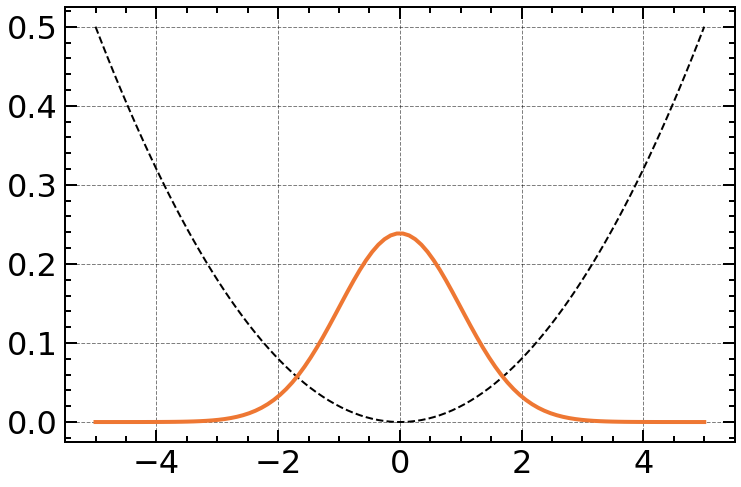

In [7]:
C1 = smp.symbols('C1')
psi0 = sol.rhs.subs([(C1, 1)])
psi0_lmb = smp.lambdify(x, psi0)

def normalized(vec):
    return vec / np.sqrt(np.sum(vec**2))

xx = np.linspace(-5, 5, 100)
plt.plot(xx, 0.02 * xx**2, "k--", lw=1.0) # arbitrary scaling of the potential
plt.plot(xx, normalized(psi0_lmb(xx)));

Even in the ground state, the state with the smallest total energy, the particle is not
localized at $x =0$, but also has non-vanishing probabilities for 
$|x| > 0$. Thus, we have both potential and kinetic energy in the ground state:
the particle *is not* resting in the ground state.

This is of course an expression of [Heisenberg's uncertainty principle][helgoland], which 
I don't want to go into here (maybe in a later post). But in the end
the ground energy of $\frac{1}{2} \hbar \omega$ is a consequence of the non 
vanishing commutator $[\hat x, \hat p] = i \hbar$, as we saw above. And this
is also the uncertainty relation in a nutshell.

[helgoland]: https://en.wikipedia.org/wiki/Uncertainty_principle

Now that we have the ground state $\psi_0$ we can use the $\hat a^\dagger$ operator 
to generate all other eigenfunctions:

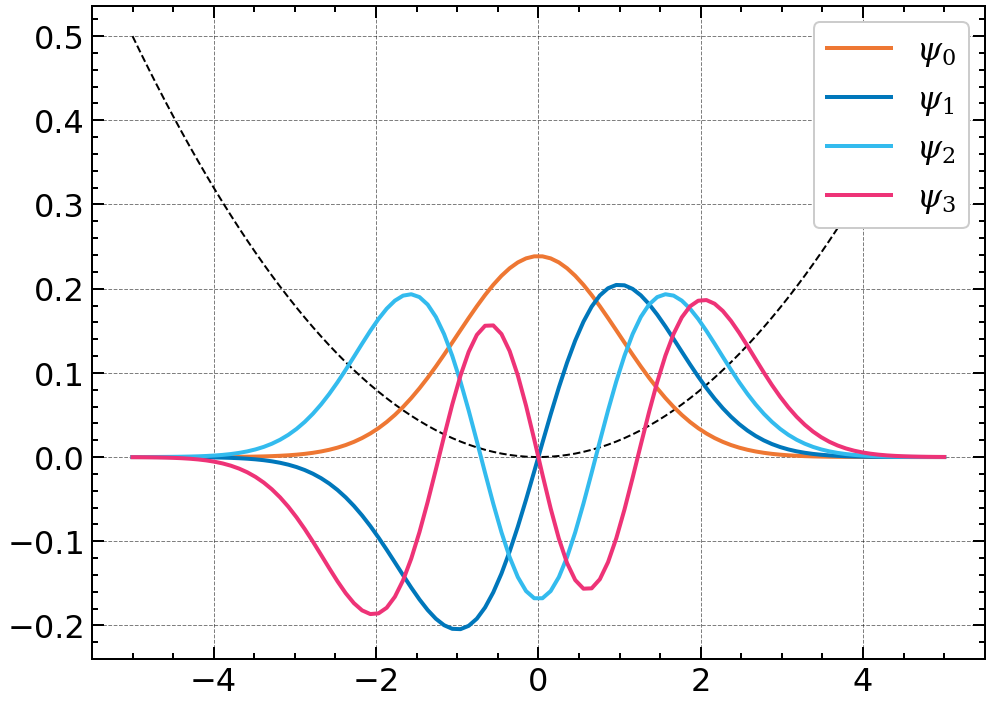

In [8]:
def a_dagger(func):
    return x * func - smp.diff(func, x)

xx = np.linspace(-5, 5, 100)
plt.figure(figsize=(8,6))
plt.plot(xx, 0.02 * xx**2, "k--", lw=1.0) # arbitrary scaling of the potential
plt.plot(xx, normalized(psi0_lmb(xx)), label="$\psi_0$")

psi = 1 * psi0  # make a copy, so that we dont change the original function below

for n in range(1, 4):
    psi = a_dagger(psi)
    psi_lmb = smp.lambdify(x, psi)
    plt.plot(xx, normalized(psi_lmb(xx)), label="$\psi_{}$".format(n))

plt.legend(loc='upper right');

One can see here very clearly that:

* The wave functions are alternately symmetric $\psi(\tilde x) = \psi(- \tilde x)$ or
  antisymmetric $\psi(\tilde x) = -\psi(- \tilde x)$ with respect to the origin.
  
* The quantum number $n$ also gives the number of nodes, i.e. zeros, of the wave function.

* As expected, the wavefunctions vanish for $|x| \to \infty$. Any non-vanishing
  probability for large amplitudes would mean arbitrarily large energies.
  

## References

* David J. Griffiths, Introduction to Quantum Mechanics, 2nd Edition, Section 2.3
* <https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator#Ladder_operator_method>